 # Importing Dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
ds=pd.read_csv('titanic_train.csv')

In [3]:
df=pd.DataFrame(ds)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

891: Rows
12 : Columns

In [5]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

5 Object datatype, 7 numeric datatype

In [6]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

12 Columns are there , Target label is Survived

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

There are Nan values in Age, Cabin and Embarked columns

# Data Analysis:

## Visualization:

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

0    549
1    342
Name: Survived, dtype: int64


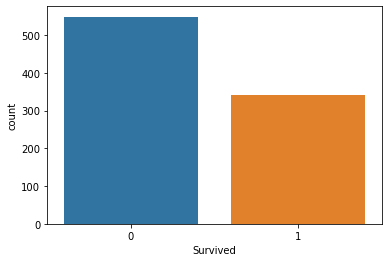

In [9]:
#Survived passanger
ax = sns.countplot(x="Survived", data=df)
print(df["Survived"].value_counts())

From the above observations the total number of dead(0) is 549 and total number of Survived(1) is 342.
although class imbalance doesnt exist much but still difference is there between survived and died number.

0    549
1    342
Name: Survived, dtype: int64


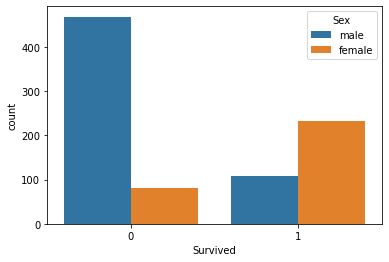

In [10]:
# Survived passenger vs sex of passenger
ax = sns.countplot(x="Survived", data=df,hue='Sex')
print(df["Survived"].value_counts())

From the above observations the number of Male have died more than female
Female have survived more than male.

3    491
1    216
2    184
Name: Pclass, dtype: int64


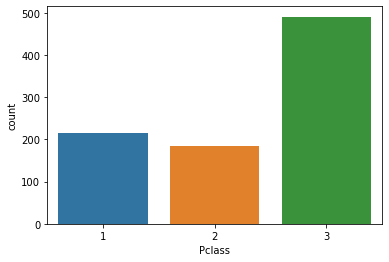

In [11]:
#Passanger class 
ax = sns.countplot(x="Pclass", data=df)
print(df["Pclass"].value_counts())

There are 216: 1st class , 184: 2nd class and 491: 3rd class people and 3rd class people are more

0    549
1    342
Name: Survived, dtype: int64


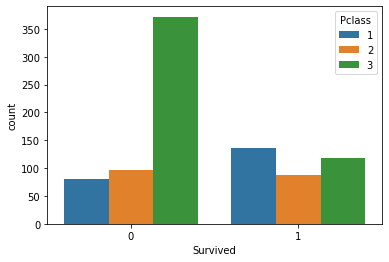

In [12]:
# Survived people vs Passanger class
ax = sns.countplot(x="Survived", data=df,hue='Pclass')
print(df["Survived"].value_counts())

S    644
C    168
Q     77
Name: Embarked, dtype: int64


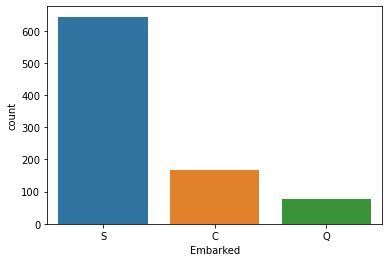

In [13]:
# Embarked data
ax = sns.countplot(x="Embarked", data=df)
print(df["Embarked"].value_counts())

There are number of passanger from Port of Embarkation C(Cherbourg) = 168, Q(Queenstown)=77, S(Southampton)=644

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

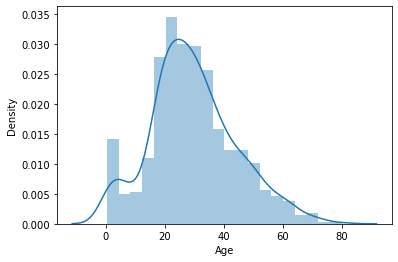

In [14]:
# Numeric data so using distplot:
sns.distplot(df['Age'], kde=True)

Data is not normally distributed, has skewness.

<AxesSubplot:xlabel='Age', ylabel='Count'>

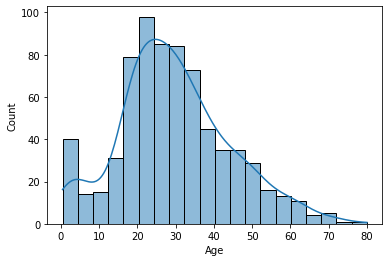

In [15]:
# Numeric data so using histplot:
sns.histplot(df['Age'], kde=True)

Data is not normally distributed, has skewness.

<AxesSubplot:xlabel='Age', ylabel='count'>

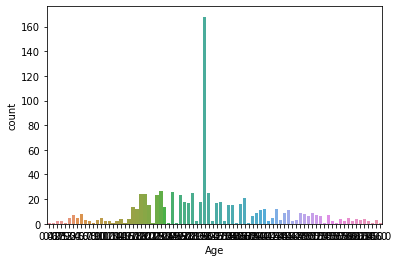

In [68]:
# Numeric data so using histplot:
sns.countplot(df['Age'])

age column is not normally distributed

### Visualizing Null Values:

<AxesSubplot:>

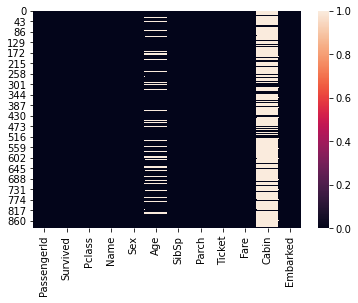

In [16]:
sns.heatmap(df.isnull())

From the observation 'Cabin' column has more null values than 'Age' column

In [17]:
# finding nan values in Age column:
df['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [18]:
# Percentage of null value in Age column

(df['Age'].isnull().sum()/len(df['Age']))*100

19.865319865319865

19.8% null values in Age column

In [19]:
# finding nan values in Cabin column:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [20]:
# Percentage of null value in Cabin column

(df['Cabin'].isna().sum()/len(df['Cabin']))*100

77.10437710437711

77.1% null values in Cabin column

## Data Cleaning: 

In [21]:
# Filling nan values with mean value for Age column:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [22]:
df['Age'].isnull().sum()

0

Nan values are zero now.

In [23]:
#Dropping Cabin column due to 77.1% nan value

df.drop('Cabin',axis=1,inplace=True)

In [24]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Cabin column dropped

In [25]:
#Check for the non-numeric column

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


Name, ticket number and embarked columns are non numerical and are not useful as they does not affect the prediction of survived passanger much so dropping them.
Encoding Sex column using get_dummies for converting it to numeric datatype.

## Encoding Sex column using get_dummies method

In [27]:
#convert sex column to numerical values
gender=pd.get_dummies(df['Sex'],drop_first=True)
df['Gender']=gender
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1


Encoded sex column and converted into numeric column and named it gender 
so now we have sex and gender column so will drop sex column as encoded data is present in gender column.

In [28]:
df.drop(['Name','Sex','Ticket','Embarked'],axis=1,inplace=True)
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Gender
0,1,0,3,22.0,1,0,7.2500,1
1,2,1,1,38.0,1,0,71.2833,0
2,3,1,3,26.0,0,0,7.9250,0
3,4,1,1,35.0,1,0,53.1000,0
4,5,0,3,35.0,0,0,8.0500,1


Dropped Name,Sex,Ticket,Embarked columns.

## Describe the dataset:

In [29]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Gender
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.647587
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429,0.477990
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200,1.000000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


Observations:

Count of data is 891 in all columns.
Mean is greater than median at Survived, Fare, SibSp, Parch that means right-tailed skewed data.
75% percentile and max: PassengerId, age and Fare have greater differences which means outliers are present in them.
mean is greater than std deviation so the data is high peaked.

<AxesSubplot:>

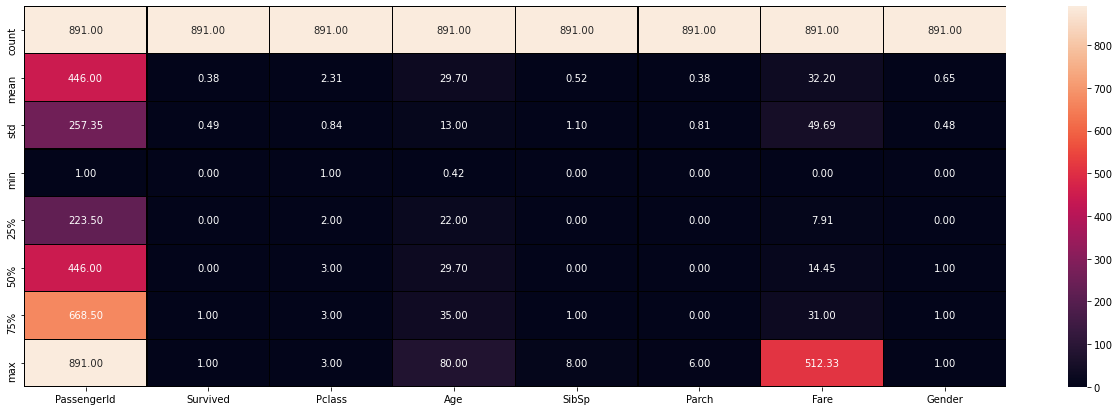

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

Heatmap representation of dataset description

## Correlation of the columns with the target columns:

In [31]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Gender
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658,0.042939
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307,-0.543351
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500,0.131900
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566,0.084153
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651,-0.114631
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225,-0.245489
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000,-0.182333
Gender,0.042939,-0.543351,0.131900,0.084153,-0.114631,-0.245489,-0.182333,1.000000


correlation of input with target variable

<AxesSubplot:>

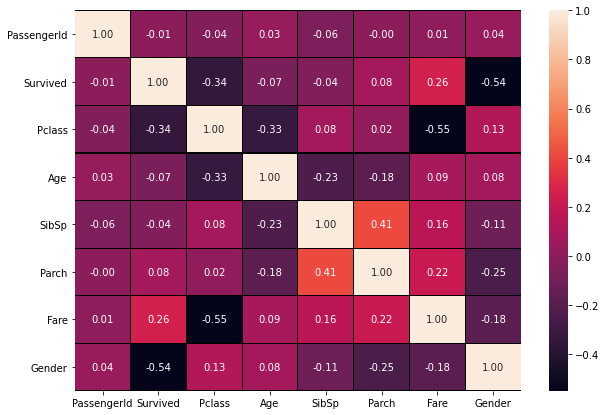

In [32]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor="Black",fmt="0.2f")

Observations:
1. Survived is highly positively corrleated with Fare: 0.26
2. Survived is negatively corrleated with Gender: -0.54
3. Fare is positively correlated with Survived: 0.26
4. Fare is negatively correlated with Pclass: -0.55

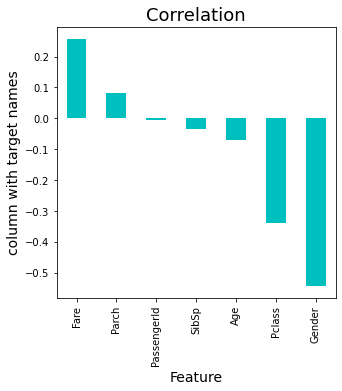

In [33]:
plt.figure(figsize=(5,5))
df.corr()['Survived'].sort_values(ascending=False).drop(['Survived']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

SibSp, Age, Pclass and Gender has negative correlation and  Fare, Parch and PassengerId has positive correlation with Target variable.

## Outliers:

PassengerId       AxesSubplot(0.125,0.657941;0.227941x0.222059)
Survived       AxesSubplot(0.398529,0.657941;0.227941x0.222059)
Pclass         AxesSubplot(0.672059,0.657941;0.227941x0.222059)
Age               AxesSubplot(0.125,0.391471;0.227941x0.222059)
SibSp          AxesSubplot(0.398529,0.391471;0.227941x0.222059)
Parch          AxesSubplot(0.672059,0.391471;0.227941x0.222059)
Fare                 AxesSubplot(0.125,0.125;0.227941x0.222059)
Gender            AxesSubplot(0.398529,0.125;0.227941x0.222059)
dtype: object

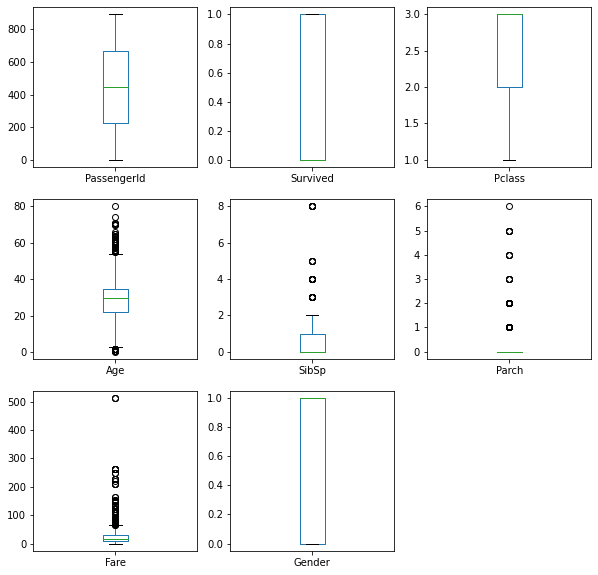

In [34]:
df.plot(kind='box',subplots=True,layout=(3,3),figsize=(10,10))

Age, SibSp, Parch and Fare column has outliers.

In [35]:
# Removing Outliers: 

from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([ 13,  16,  25,  27,  50,  59,  68,  71,  86,  88,  96, 116, 118,
        119, 159, 164, 167, 171, 180, 182, 201, 233, 258, 261, 266, 278,
        299, 311, 324, 341, 360, 377, 380, 386, 437, 438, 438, 480, 493,
        527, 541, 542, 557, 567, 610, 630, 638, 672, 678, 679, 683, 686,
        689, 700, 716, 730, 736, 737, 742, 745, 774, 779, 787, 792, 813,
        824, 846, 850, 851, 858, 863, 885], dtype=int64),
 array([5, 4, 5, 6, 4, 4, 4, 4, 5, 6, 3, 3, 6, 4, 4, 4, 5, 4, 4, 4, 4, 4,
        6, 4, 4, 4, 6, 6, 4, 6, 5, 6, 6, 4, 5, 5, 6, 4, 3, 6, 4, 4, 6, 5,
        5, 3, 5, 3, 5, 6, 4, 4, 6, 6, 6, 6, 5, 6, 6, 3, 5, 6, 4, 4, 4, 4,
        4, 4, 3, 5, 4, 5], dtype=int64))

In [36]:
#removing value greater than threshold value 

df_new=df[(z<3).all(axis=1)]
df_new

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Gender
0,1,0,3,22.000000,1,0,7.2500,1
1,2,1,1,38.000000,1,0,71.2833,0
2,3,1,3,26.000000,0,0,7.9250,0
3,4,1,1,35.000000,1,0,53.1000,0
4,5,0,3,35.000000,0,0,8.0500,1
...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,1
887,888,1,1,19.000000,0,0,30.0000,0
888,889,0,3,29.699118,1,2,23.4500,0
889,890,1,1,26.000000,0,0,30.0000,1


Outliers Removed

In [37]:
df=df_new
df.shape

(820, 8)

Rows: 820 and Column: 8

#### Percentage Loss of data

In [38]:
Data_loss=((891-820)/891)*100
Data_loss

7.968574635241302

7.9% data loss

## Skewness:

In [39]:
x=df[['PassengerId','Pclass','Age','SibSp','Parch','Fare','Gender']]
y=df['Survived']

In [40]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

In [41]:
x

array([[-2.15631324,  0.87283049, -0.61846778, ..., -0.48469263,
        -0.83470177,  0.72203588],
       [-2.14032052, -1.47067587,  0.68588353, ..., -0.48469263,
         1.55364494, -1.38497273],
       [-2.12579352,  0.87283049, -0.28381447, ..., -0.48469263,
        -0.74331399, -1.38497273],
       ...,
       [ 1.56705476,  0.87283049,  0.0200539 , ...,  2.08665417,
         0.39490799, -1.38497273],
       [ 1.57009584, -1.47067587, -0.28381447, ..., -0.48469263,
         0.65432009,  0.72203588],
       [ 1.57313595,  0.87283049,  0.20668289, ..., -0.48469263,
        -0.76629016,  0.72203588]])

 skewness is reduced by Johnson method

# Scaling Data

In [42]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x=sc.fit_transform(x)
x

array([[-2.15631324,  0.87283049, -0.61846778, ..., -0.48469263,
        -0.83470177,  0.72203588],
       [-2.14032052, -1.47067587,  0.68588353, ..., -0.48469263,
         1.55364494, -1.38497273],
       [-2.12579352,  0.87283049, -0.28381447, ..., -0.48469263,
        -0.74331399, -1.38497273],
       ...,
       [ 1.56705476,  0.87283049,  0.0200539 , ...,  2.08665417,
         0.39490799, -1.38497273],
       [ 1.57009584, -1.47067587, -0.28381447, ..., -0.48469263,
         0.65432009,  0.72203588],
       [ 1.57313595,  0.87283049,  0.20668289, ..., -0.48469263,
        -0.76629016,  0.72203588]])

Independent values are scaled 

# Model Selection:

## Logistic Regression:

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [44]:
l=[]
for i in range(0,1000):
    train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.20,random_state=i)
    lr.fit(train_x,train_y)
    pred_train=lr.predict(train_x)
    pred_test=lr.predict(test_x)
    # 
    if round(accuracy_score(train_y,pred_train)*100,1)==round(accuracy_score(test_y,pred_test)*100,1):
        print("At random state",i,"The model performs very well")
        print("At random state:-",i)
        print("Training r2_score is:-",accuracy_score(train_y,pred_train)*100)
        print("Testing r2_score is:-",accuracy_score(test_y,pred_test)*100)
        l.append(i)

At random state 65 The model performs very well
At random state:- 65
Training r2_score is:- 79.26829268292683
Testing r2_score is:- 79.26829268292683
At random state 86 The model performs very well
At random state:- 86
Training r2_score is:- 79.8780487804878
Testing r2_score is:- 79.8780487804878
At random state 101 The model performs very well
At random state:- 101
Training r2_score is:- 79.26829268292683
Testing r2_score is:- 79.26829268292683
At random state 127 The model performs very well
At random state:- 127
Training r2_score is:- 79.8780487804878
Testing r2_score is:- 79.8780487804878
At random state 147 The model performs very well
At random state:- 147
Training r2_score is:- 79.8780487804878
Testing r2_score is:- 79.8780487804878
At random state 154 The model performs very well
At random state:- 154
Training r2_score is:- 79.8780487804878
Testing r2_score is:- 79.8780487804878
At random state 169 The model performs very well
At random state:- 169
Training r2_score is:- 79.878

In [45]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.20,random_state=861)

In [46]:
print(classification_report(test_y,pred_test))

              precision    recall  f1-score   support

           0       0.63      0.69      0.66        95
           1       0.52      0.45      0.48        69

    accuracy                           0.59       164
   macro avg       0.58      0.57      0.57       164
weighted avg       0.58      0.59      0.59       164



Classification Report shows  precision, recall, f1-score and support

## Cross validation score for Logistic Regression

In [47]:
pred_lr=lr.predict(test_x)
from sklearn.model_selection import cross_val_score
lss= accuracy_score(test_y,pred_lr)

for j in range(2,10):
    lsscore= cross_val_score(lr,x,y,cv=j)
    lsc=lsscore.mean()
    print("At cv:-",j)
    print("Cross validation score is:-", lsc*100)
    print("Accuracy score is:-", lss*100)

At cv:- 2
Cross validation score is:- 76.34146341463415
Accuracy score is:- 79.8780487804878
At cv:- 3
Cross validation score is:- 78.66055274814397
Accuracy score is:- 79.8780487804878
At cv:- 4
Cross validation score is:- 78.65853658536585
Accuracy score is:- 79.8780487804878
At cv:- 5
Cross validation score is:- 78.53658536585367
Accuracy score is:- 79.8780487804878
At cv:- 6
Cross validation score is:- 79.1469872620581
Accuracy score is:- 79.8780487804878
At cv:- 7
Cross validation score is:- 78.90565178700771
Accuracy score is:- 79.8780487804878
At cv:- 8
Cross validation score is:- 79.38796877974491
Accuracy score is:- 79.8780487804878
At cv:- 9
Cross validation score is:- 79.2681955725434
Accuracy score is:- 79.8780487804878


Cross validation score is:- 79.2681955725434%
Accuracy score is:- 79.8780487804878%

# AUC ROC CURVE:

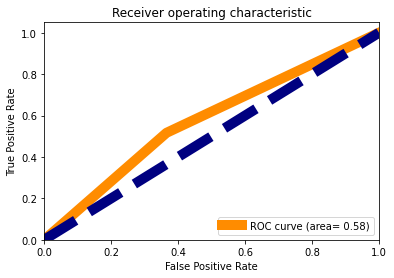

In [48]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds= roc_curve(pred_test,test_y)
roc_auc = auc(fpr,tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',lw=10, label='ROC curve (area= %0.2f)' % roc_auc)
plt.plot([0,1],[0,1], color='navy', lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc='lower right')
plt.show()

AUC ROC curve plotting, as its value is 58%, which is good.

In [49]:
# GridsearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
import warnings
warnings.filterwarnings('ignore')
alphav= {'alpha':[1,0.1,0.01,0.001,0.0001,0]}
model=Ridge()
grid= GridSearchCV(estimator=model,param_grid=alphav)
grid.fit(train_x,train_y)
print(grid)
print(grid.best_score_)
print(grid.best_estimator_.alpha)
print(grid.best_params_)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [1, 0.1, 0.01, 0.001, 0.0001, 0]})
0.3696838535284316
1
{'alpha': 1}


Best parameters for Logistic Classifier 

In [50]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(train_x,train_y)
print('lr score:',lr.score(train_x,train_y))
rd=Ridge(alpha=1)
rd.fit(train_x,train_y)
print('Score:', rd.score(train_x,train_y))
print(rd.coef_)
print('Score:', rd.score(train_x,train_y))

lr score: 0.7987804878048781
Score: 0.39159579910420217
[ 0.009104   -0.11274031 -0.05818651 -0.00961071  0.01102873  0.04178772
 -0.24488926]
Score: 0.39159579910420217


lr Score:79%

## Decision Tree classifier

In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier()
grid_param={
    'criterion':['gini','entropy']
  }
gd_sr=GridSearchCV(estimator=dtc,
                  param_grid=grid_param,
                  scoring='accuracy',
                  cv=5)
gd_sr.fit(train_x,train_y)
best_parameters=gd_sr.best_params_
print(best_parameters)
best_result=gd_sr.best_score_
print(best_result)

print(round(best_result,2))

{'criterion': 'gini'}
0.7881101087207957
0.79


In [52]:
dtc= DecisionTreeClassifier(criterion='gini')
dtc.fit(train_x,train_y)
dtc.score(train_x,train_y)

1.0

In [53]:
dtscore = cross_val_score(dtc,x,y,cv=9)
dts = dtscore.mean()
print('Cross Val Score:',dts*100)

Cross Val Score: 72.08021447151881


Cross Val Score: 70.6 %

In [54]:
#Predicted value
pred = dtc.predict(test_x)
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy=accuracy_score(test_y,pred)
confusion= confusion_matrix(test_y,pred)
print("Accuracy of the model is: ",accuracy)
print("Confusion Matrix: ", confusion)

Accuracy of the model is:  0.7865853658536586
Confusion Matrix:  [[76 19]
 [16 53]]


Accuracy of Decision Tree Classifier model is 77.4%

## SVM(SVC)

In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
parameters={'kernel':['linear','rbf'],'C':[1,10]}
svc=svm.SVC()
clf= GridSearchCV(svc,parameters)
clf.fit(train_x,train_y)
print(clf.best_params_)

{'C': 1, 'kernel': 'rbf'}


Best parameters for SVC 

In [56]:
sv=svm.SVC(kernel='rbf',C=1)
sv.fit(train_x,train_y)
sv.score(train_x,train_y)

0.8353658536585366

SV Score: 83.5%

In [57]:
#Predicted value
pred = sv.predict(test_x)
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy=accuracy_score(test_y,pred)
confusion=confusion_matrix(test_y,pred)
print("Accuracy of the model is: ",accuracy)
print("Confusion Matrix: ", confusion)

Accuracy of the model is:  0.7926829268292683
Confusion Matrix:  [[82 13]
 [21 48]]


Accuracy of the model is:79.2%

In [58]:
svscore = cross_val_score(sv,x,y,cv=9)
svs = svscore.mean()
print('Cross Val Score:',svs*100)

Cross Val Score: 81.46467059510539


Cross Val Score: 81.46467059510539 %

## RandomForestClassifier

In [59]:
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

forest_params = [{'max_depth': list(range(10, 15)), 'max_features': list(range(0,14))}]

clf = GridSearchCV(rfc, forest_params, cv = 10, scoring='accuracy')

clf.fit(train_x,train_y)
    
print(clf.best_params_)

{'max_depth': 11, 'max_features': 1}


Best parameters for RandomForestClassifier 

In [69]:
rfc= RandomForestClassifier(max_depth=11,max_features=1)
rfc.fit(train_x,train_y)
rfc.score(train_x,train_y)

0.9649390243902439

In [70]:
#Predicted value
pred = rfc.predict(test_x)
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy=accuracy_score(test_y,pred)
confusion=confusion_matrix(test_y,pred)
print("Accuracy of the model is: ",accuracy)
print("Confusion Matrix: ", confusion)

Accuracy of the model is:  0.8109756097560976
Confusion Matrix:  [[84 11]
 [20 49]]


Accuracy of the model is: 82.3%

In [71]:
rfscore = cross_val_score(rfc,x,y,cv=9)
rfs = rfscore.mean()
print('Cross Val Score:',rfs*100)

Cross Val Score: 81.09969740404523


Cross Val Score:81.09%

## Best Model is Random forest classifier as it has Accuracy of 82.3% and Cross val score of 81.09%

# Model saving:

In [72]:
import pickle
filename = 'Titanic.pkl'
pickle.dump(rfc, open(filename, 'wb'))

# Conclusion:

In [73]:
import numpy as np
a=np.array(test_y)
pred=np.array(rfc.predict(test_x))
df_com=pd.DataFrame({"original":a, "predicted": pred},index= range(len(a)))
df_com

,original,predicted
0,1,1
1,1,1
2,0,0
3,1,1
4,0,0
...,...,...
159,0,0
160,1,1
161,1,0
162,0,0


As per observation the predicted and actual data are almost same as model has accuracy of 82.3% and cross val score of 81.09%